In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/train_pipeline/car_price_prediction.csv')
df.head()
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].str.replace(',', '').astype(float)
df['Engine volume'] = df['Engine volume'].str.extract(r'([0-9.]+)').astype(float)
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
df['Doors'] = df['Doors'].str.extract(r'(\d+)').astype(float)

Delete unnecessary columns

In [7]:
df = df.drop(columns=['ID', 'Model','Wheel','Color','Gear box type','Drive wheels'])

Cél változó megadása

In [8]:
y = df['Price']
X = df.drop(columns=['Price'])


Manufacturer oszlop Hot n kódolása

In [9]:
X = pd.get_dummies(X, columns=['Manufacturer','Category','Fuel type'], drop_first=True)

X.head()

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,1399.0,2010,1,3.5,186005,6.0,4.0,12,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1018.0,2011,0,3.0,192000,6.0,4.0,8,False,False,...,False,False,False,False,False,False,False,False,True,False
2,NaN,2006,0,1.3,200000,4.0,4.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
3,862.0,2011,1,2.5,168966,4.0,4.0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,446.0,2014,1,1.3,91901,4.0,4.0,4,False,False,...,False,False,False,False,False,False,False,False,True,False


Hiányzó értékek pótlása

In [10]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

Train

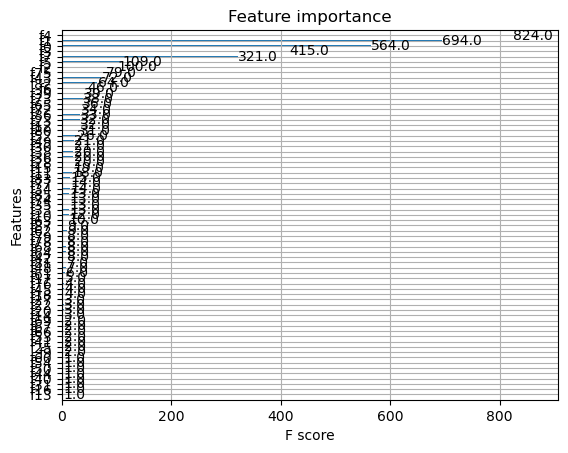

In [12]:


# Linear Regression
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
plot_importance(xgb)
plt.show()

Kiértékelés

In [13]:

print("\nXGB Regression:")
y_train_pred = xgb.predict(X_train)

y_test_pred = xgb.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


XGB Regression:
MAE: 6027.5654296875
R²: 0.518359899520874
